In [77]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv("filtered_data_with_bidask.csv");


In [108]:
import statistics
df['Date'] = pd.to_datetime(df['Date'])

In [106]:
tickers = list(df.columns.values);
def unit(ticker, warrantFrac):
    idx = tickers.index(ticker)
    
    commonAsk = df[tickers[idx] + ".1"]
    commonBid = df[tickers[idx] + ".2"]
    
    warrantAsk = df[tickers[idx + 3] + ".1"]
    warrantBid = df[tickers[idx + 3] + ".2"]

    unitAsk = df[tickers[idx + 6] + ".1"]
    unitBid = df[tickers[idx + 6] + ".2"]
    
    dates = []
    profit = []
    totalProfit = [];
    totalInvestment = 0;
    for row in range(commonAsk.shape[0]):
        #buy and split units
        unitPrice = unitAsk[row] 
        
        commonPrice = commonBid[row]
        warrantPrice = warrantBid[row]
        
        if (commonPrice > 0 and warrantPrice > 0 and unitPrice > 0):
            if (warrantPrice * warrantFrac + commonPrice > unitPrice + 0.05):
                dates.append(df["Date"][row])
                profit.append(warrantPrice * warrantFrac + commonPrice - unitPrice)
                totalProfit.append(sum(profit))
                totalInvestment += unitPrice
                
    plt.plot(dates, totalProfit)
    print ("avg profit: " + str(sum(profit) / len(profit)))
    print ("num trades: " + str(len(profit)))
    print(totalInvestment)
    print(totalProfit[len(totalProfit) - 1])

avg profit: 0.1093812500000001
num trades: 16
210.86
1.7501000000000015


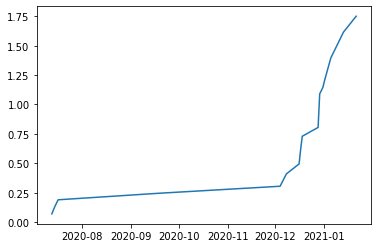

In [107]:
unit("ASTS", 0.5)

In [126]:
min_df = pd.read_csv("filtered_minute_data.csv");

In [127]:
min_df = min_df.drop(axis = 1, labels="Unnamed: 0")

In [133]:
cols = min_df.columns.values
for col in cols:
    if ("Date" in col):
        min_df[col] = pd.to_datetime(min_df[col])
min_df = min_df.drop(labels=0, axis=0)

In [142]:
min_df.head()

,Date,ASTS,Date.1,ASTS.1,Date.2,ASTSW,Date.3,ASTSW.1,Date.4,NPAUU,...,Date.41,LOACW.1,Date.42,PCT,Date.43,PCT.1,Date.44,PCTTW,Date.45,PCTTW.1
1,2021-03-17 09:01:00,12.50,2021-03-17 09:03:00,12.56,2021-03-17 09:03:00,4.03,2021-03-17 09:04:00,4.14,2021-03-17 09:11:00,13.61,...,2021-03-17 09:06:00,1.33,2021-03-17 09:03:00,26.53,2021-03-17 09:01:00,26.92,2021-03-17 09:03:00,12.85,2021-03-17 09:05:00,13.00
2,2021-03-17 09:03:00,12.54,2021-03-17 09:04:00,12.54,2021-03-17 09:04:00,4.03,2021-03-17 09:05:00,4.14,2021-03-17 09:14:00,13.60,...,2021-03-17 09:07:00,1.33,2021-03-17 09:04:00,26.52,2021-03-17 09:03:00,26.95,2021-03-17 09:04:00,12.75,2021-03-17 09:06:00,13.00
3,2021-03-17 09:04:00,12.52,2021-03-17 09:05:00,12.56,2021-03-17 09:05:00,4.03,2021-03-17 09:06:00,4.11,2021-03-17 10:12:00,13.61,...,2021-03-17 09:08:00,1.33,2021-03-17 09:05:00,26.95,2021-03-17 09:04:00,26.80,2021-03-17 09:05:00,12.95,2021-03-17 09:07:00,13.25
4,2021-03-17 09:05:00,12.53,2021-03-17 09:06:00,12.50,2021-03-17 09:08:00,4.03,2021-03-17 09:07:00,4.10,2021-03-17 11:33:00,13.61,...,2021-03-17 09:09:00,1.35,2021-03-17 09:06:00,26.90,2021-03-17 09:05:00,27.00,2021-03-17 09:06:00,12.96,2021-03-17 09:09:00,13.25
5,2021-03-17 09:06:00,12.45,2021-03-17 09:07:00,12.46,2021-03-17 09:11:00,4.05,2021-03-17 09:08:00,4.10,2021-03-17 12:07:00,13.62,...,2021-03-17 09:57:00,1.35,2021-03-17 09:07:00,27.00,2021-03-17 09:06:00,27.10,2021-03-17 09:07:00,13.17,2021-03-17 09:16:00,13.55


In [178]:
cols = list(min_df.columns.values)

def unitArbMin(ticker, warrantFraction):
    idx = cols.index(ticker)

    commonBid = min_df[cols[idx]]
    commonAsk = min_df[cols[idx + 2]]
    
    warrantBid = min_df[cols[idx + 4]]
    warrantAsk = min_df[cols[idx + 6]]
    
    unitBid = min_df[cols[idx + 8]]
    unitAsk = min_df[cols[idx + 10]]

    dates = []
    profit = []
    totalProfit = [];
    totalInvestment = 0;
    cnt = 0;
    for row in range(1, unitAsk.shape[0]):
        time = min_df[cols[idx + 9]][row]
        
        #buy and split units
        unitPrice = unitAsk[row]
        
        if (len(min_df[min_df[cols[idx - 1]] == time].index) > 0 and len(min_df[min_df[cols[idx + 3]] == time].index) > 0):
            commonPrice = commonBid[min_df[min_df[cols[idx - 1]] == time].index[0]]
            warrantPrice = warrantBid[min_df[min_df[cols[idx + 3]] == time].index[0]]

            if (commonPrice > 0 and warrantPrice > 0 and unitPrice > 0):
                cnt += 1;
                if (warrantPrice * warrantFraction + commonPrice > unitPrice):
                    dates.append(time)
                    profit.append(warrantPrice * warrantFraction + commonPrice - unitPrice)
                    totalProfit.append(sum(profit))
                    totalInvestment += unitPrice
                
    plt.plot(dates, totalProfit)
    print ("avg profit: " + str(sum(profit) / len(profit)))
    print ("num trades: " + str(len(profit)))
    print(totalInvestment)
    print(totalProfit[len(totalProfit) - 1])
    print(dates[len(dates) - 1] - dates[0])
    print (cnt)

avg profit: 0.06625000000000014
num trades: 4
55.8
0.26500000000000057
11 days 03:56:00
110


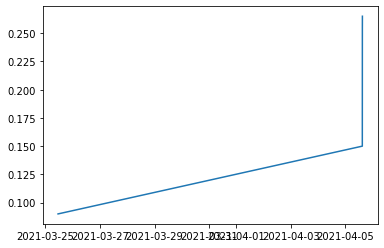

In [179]:
unitArbMin("ASTS", 0.5)
